In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

adasd


In [2]:
x = torch.rand(5,3)
y = torch.ones(5,3, dtype=torch.long)

if torch.cuda.is_available():
    device = torch.device("cuda")
    y = torch.ones_like(x, device=device)
    x = x.to(device)
    z=x+y
    print(z)
    print(z.to("cpu",torch.double))

tensor([[1.4533, 1.3934, 1.1115],
        [1.5276, 1.4125, 1.9368],
        [1.1473, 1.2467, 1.3998],
        [1.7984, 1.2363, 1.3737],
        [1.7787, 1.1366, 1.8927]], device='cuda:0')
tensor([[1.4533, 1.3934, 1.1115],
        [1.5276, 1.4125, 1.9368],
        [1.1473, 1.2467, 1.3998],
        [1.7984, 1.2363, 1.3737],
        [1.7787, 1.1366, 1.8927]], dtype=torch.float64)


In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,),(0.5,))])

trainset = torchvision.datasets.FashionMNIST('data',
  download = True,
  train = True,
  transform = transform  
)

testset = torchvision.datasets.FashionMNIST('data',
  download = True,
  train = False,
  transform = transform  
)


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [29]:
print(testset)

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                      shuffle=True, num_workers=10)

testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                        shuffle=False, num_workers=5)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [5]:
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# helper function to show an image
# (used in the `plot_classes_preds` function below)
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


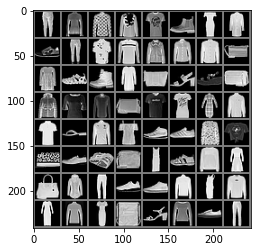

In [6]:
dataiter = iter(trainloader)
images, labels= dataiter.next()

matplotlib_imshow(torchvision.utils.make_grid(images))

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [9]:
import torch.nn as nn
import torch.nn.functional as F

class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784,256)
    self.fc2 = nn.Linear(256,128)
    self.fc3 = nn.Linear(128,64)
    self.fc4 = nn.Linear(64,10)
    
  def forward(self,x):
    x = x.view(x.shape[0], -1)

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.log_softmax(self.fc4(x), dim=1)

    return x  

In [10]:
import torch.optim as optim

model = Classifier()

model.cuda()

criterion = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(),lr=0.01)

In [11]:
model.fc1.weight

Parameter containing:
tensor([[ 0.0328,  0.0152,  0.0172,  ...,  0.0199, -0.0171,  0.0356],
        [ 0.0262, -0.0061, -0.0173,  ..., -0.0287,  0.0178, -0.0275],
        [ 0.0342, -0.0328,  0.0120,  ..., -0.0259,  0.0274, -0.0105],
        ...,
        [-0.0261, -0.0010,  0.0100,  ..., -0.0187,  0.0336,  0.0148],
        [-0.0154,  0.0150, -0.0045,  ...,  0.0137,  0.0084,  0.0050],
        [-0.0325, -0.0340, -0.0318,  ..., -0.0255, -0.0038,  0.0071]],
       device='cuda:0', requires_grad=True)

In [12]:
images, labels = iter(trainloader).next()
log_ps = model(images.cuda())
loss = criterion(log_ps, labels.cuda())

loss.backward()

print(model.fc2.weight.grad)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


tensor([[-2.5376e-05,  0.0000e+00,  0.0000e+00,  ..., -2.2043e-06,
         -2.2586e-05, -4.7409e-05],
        [-6.9522e-04,  1.0154e-03, -1.3036e-04,  ...,  4.3737e-04,
          1.2475e-03,  1.3556e-03],
        [-1.0425e-03, -3.5580e-03,  5.4650e-05,  ..., -3.6325e-04,
         -3.9189e-03, -2.7048e-03],
        ...,
        [ 5.2623e-04,  9.1055e-05,  6.9435e-05,  ..., -3.0698e-04,
          7.2498e-04,  2.4774e-04],
        [ 2.8273e-04,  6.4946e-04,  0.0000e+00,  ...,  5.9685e-04,
          8.7910e-04,  4.1244e-04],
        [ 8.1350e-04, -5.7097e-05,  0.0000e+00,  ..., -1.1723e-04,
          3.9203e-04, -3.6371e-04]], device='cuda:0')


In [15]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('runs/fashion_mnist_experiment_1')
writer.close()

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


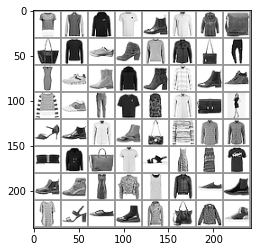

In [17]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

img_grid= torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)
writer.add_image('four_fashion_minst_images', img_grid)

In [18]:
writer.add_graph(model, images.cuda())
writer.close()

In [21]:
epochs = 5

for e in range(epochs):
  running_loss = 0
  model.train()
  for images, labels in trainloader:
    log_ps = model(images.cuda())
    loss = criterion(log_ps, labels.cuda())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss +=loss.item()
  else:
    print(f"Training loss: {running_loss/1000}",end =" ")
    writer.add_scalar('training_loss', running_loss/1000)
  
  model.eval()
  with torch.no_grad():
    total = 0
    correct = 0
    for images, labels in testloader:
      log_ps = model(images.cuda()).cpu()
      mx_index = torch.argmax(log_ps,dim=1)
      total+=labels.numel()
      correct += sum(mx_index == labels).item()
    print(f"Test Accuracy {correct/total *100:.2f}")
writer.close()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Training loss: 0.588706805318594 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Test Accuracy 77.56
Training loss: 0.5000149886459112 Test Accuracy 79.03
Training loss: 0.4524618162959814 Test Accuracy 82.38
Training loss: 0.42441948503255844 Test Accuracy 83.16
Training loss: 0.40227147094905374 Test Accuracy 81.93


In [26]:
def view_classify(img, ps, version="Fashion"):
  ps = ps.data.numpy().squeeze()
  fig, (ax1, ax2) = plt.subplots(figsize=(6,9),ncols=2)
  ax1.imshow(img.resize_(1,28,28).numpy().squeeze())
  ax1.axis("off")
  ax2.barh(np.arange(10),ps)
  ax2.set_aspect(0.1)
  ax2.set_yticks(np.arange(10))
  ax2.set_yticklabels(['T-shirt/top',
                      'Trouser',
                      'Pullover',
                      'Dress',
                      'Coat',
                      'Sandal',
                      'Shirt',
                      'Sneaker',
                      'Bag',
                      'Ankle Boot'], size='small');
  ax2.set_title('Class Probability')
  ax2.set_xlim(0, 1.1)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Predicted Class = 1
Predicted Class = 3
Predicted Class = 2
Predicted Class = 3
Predicted Class = 2


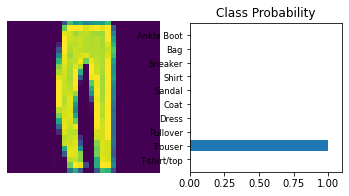

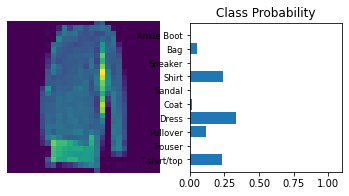

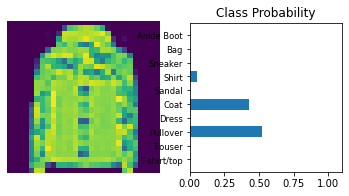

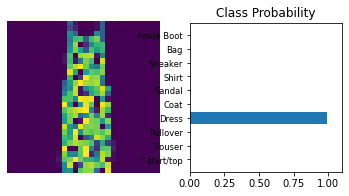

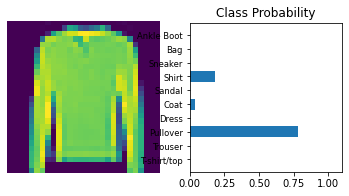

In [27]:
td = iter(testloader)
for _ in range(5):
  images, labels = next(td)

  img = images[2].view(1, 784)
  with torch.no_grad():
    logps = model(img.cuda())
  
  ps = torch.exp(logps).cpu()
  probab = list (ps.numpy()[0])
  print("Predicted Class =", probab.index(max(probab)))
  view_classify(img.view(1,28,28),ps)

In [28]:
model.state_dict()

torch.save(model.state_dict(), 'checkpoint.pt')

torch.jit.script(model).save('model.pt')